QUESTION:

Given a aerial image of a city as Satellite_image.jpg and the corresponding output expected is given as Satellite_image_mask.jpg. Apply necessary image preprocessing techniques to highlight the roads in the given satellite image and extract your predicted masks. Compare the predicted and the actual masks using appropriate performance metrics and write your inference. How can you further improve the precise segmentation of the roads.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Approach 1 - Using Contours

# Creating the contours 

In [151]:

# Load the satellite image
image = cv2.imread('/home/snucse/Desktop/SET-12/Image.png')

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding to segment the road
_, thresholded_image = cv2.threshold(gray_image, 120, 140, cv2.THRESH_BINARY)

# Apply morphological operations to clean up the image
kernel = np.ones((5, 5), np.uint8)
morph_image = cv2.morphologyEx(thresholded_image, cv2.MORPH_CLOSE, kernel)

# Find contours in the image
contours, _ = cv2.findContours(morph_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw the contours on the original image
img = cv2.drawContours(image, contours, -1, (0, 255, 0), 2)

In [152]:
# Create an empty image to store the segmented road
segmented_road = np.zeros_like(image)

# Draw the contours on the empty image
seg_image = cv2.drawContours(segmented_road, contours, -1, (255, 255, 255), 2)

# Inverting the image 

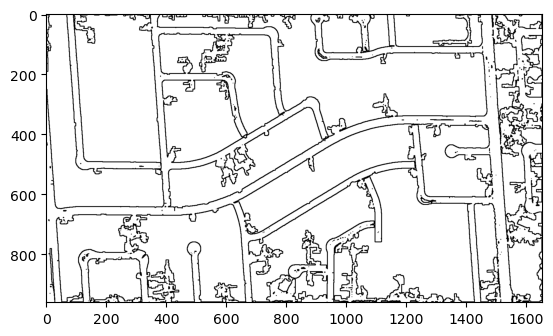

In [153]:
plt.imshow(255-seg_image)

In [154]:
seg = 255-seg_image

In [155]:
seg.shape

(961, 1656, 3)

# Erosion

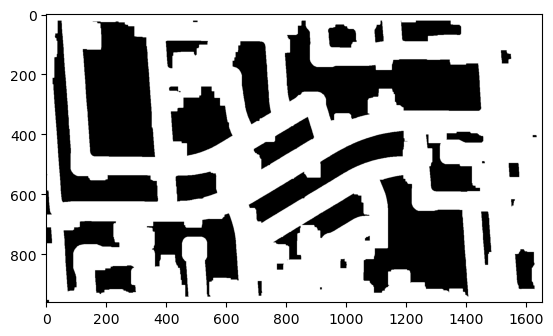

In [156]:
# Define structuring element
kernel = np.ones((10,10), np.uint8)

# Perform erosion
erosion = cv2.erode(seg, kernel, iterations = 4)

plt.imshow(255-erosion)

In [157]:
output = 255-erosion

Text(0.5, 1.0, 'Input Image')

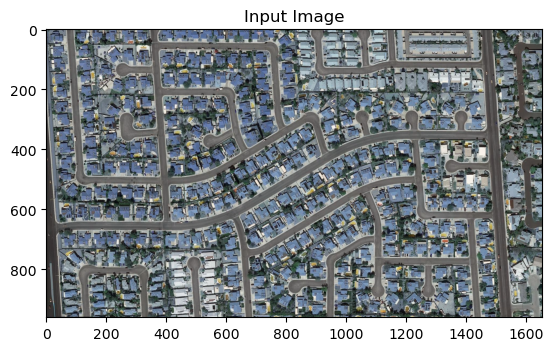

In [158]:
image = cv2.imread('/home/snucse/Desktop/SET-12/Image.png')

plt.imshow(image, cmap = 'gray')
plt.title('Input Image')

Text(0.5, 1.0, 'Given Mask')

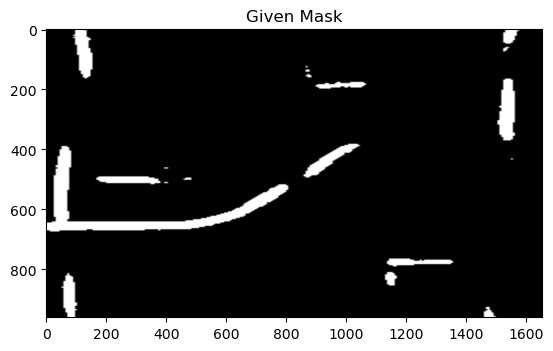

In [169]:
mask = cv2.imread('/home/snucse/Desktop/SET-12/Image_mask.png')
plt.imshow(mask, cmap = 'gray')
plt.title('Given Mask')

In [170]:
mask.shape

(961, 1656, 3)

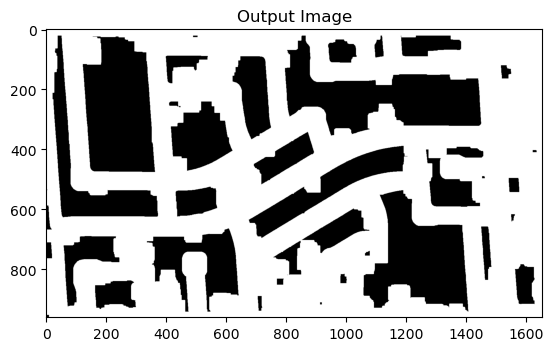

In [164]:
plt.imshow(output, cmap = 'gray')
plt.title('Output Image')
plt.show()

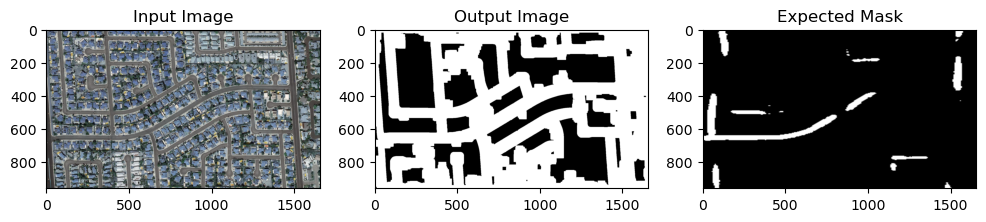

In [165]:
# Create a figure with three subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Plot the first image
axs[0].imshow(image, cmap='gray')
axs[0].set_title('Input Image')

# Plot the second image
axs[1].imshow(output, cmap='gray')
axs[1].set_title('Output Image')

# Plot the third image
axs[2].imshow(mask, cmap='gray')
axs[2].set_title('Expected Mask')

# Show the plot
plt.show()

# Comparing Scores

In [171]:
# Load the ground truth and predicted masks
ground_truth = np.array(mask)
predicted = output

# Calculate the IoU
intersection = np.logical_and(ground_truth, predicted)
union = np.logical_or(ground_truth, predicted)
iou = np.sum(intersection) / np.sum(union)

# Calculate the Dice coefficient
dice = 2 * np.sum(intersection) / (np.sum(ground_truth) + np.sum(predicted))

# Calculate the pixel accuracy
accuracy = np.sum(ground_truth == predicted) / np.sum(ground_truth)

# Print the results
print('IoU:', iou)
print('Dice coefficient:', dice)
print('Pixel accuracy:', accuracy)
print('PSNR: ', cv2.PSNR(ground_truth, predicted))

IoU: 0.06845172794071853
Dice coefficient: 0.0005095705549801294
Pixel accuracy: 0.02966240891716372
PSNR:  2.1227673209980065


# Approach 2 - Using Canny Edge Detection

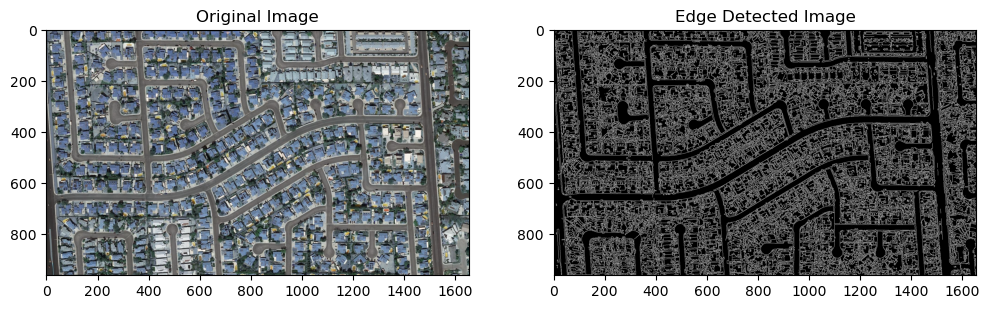

In [140]:
# Perform Canny edge detection
edges = cv2.Canny(image, 100, 200)

# Display the original image and the edge detected image
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].imshow(image, cmap='gray')
axs[0].set_title('Original Image')
axs[1].imshow(edges, cmap='gray')
axs[1].set_title('Edge Detected Image')
plt.show()

# Dilation

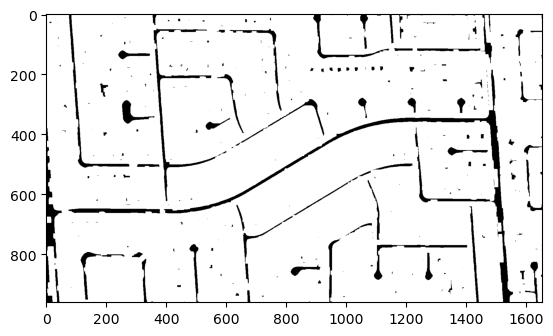

In [141]:
# Define structuring element
kernel = np.ones((7,7), np.uint8)

# Perform erosion
dilation = cv2.dilate(edges, kernel, iterations = 2)

plt.imshow(dilation, cmap = 'gray')

# Inversion

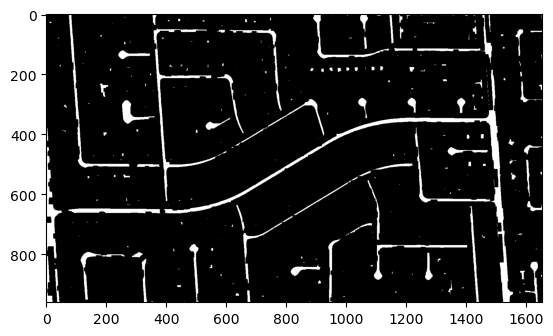

In [142]:
plt.imshow(dilation-255, cmap = 'gray')

In [143]:
output = dilation-255

# Filtering connected components based on area

In [175]:
# do connected components processing
nlabels, labels, stats, centroids = cv2.connectedComponentsWithStats(result, None, None, None, 8, cv2.CV_32S)

#get CC_STAT_AREA component as stats[label, COLUMN] 
areas = stats[1:,cv2.CC_STAT_AREA]

result = np.zeros((labels.shape), np.uint8)

for i in range(0, nlabels - 1):
    if areas[i] >= 200:   #keep
        result[labels == i + 1] = 255

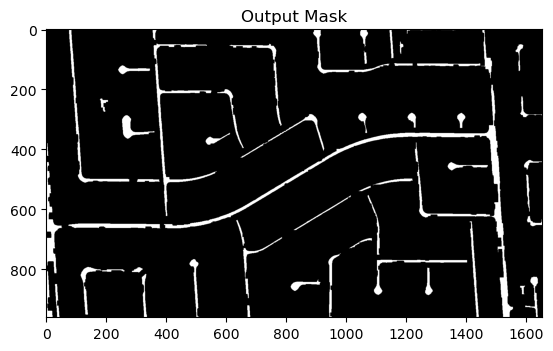

In [176]:
plt.imshow(result, cmap = 'gray')
plt.title('Output Mask')
plt.show()

# Dilation

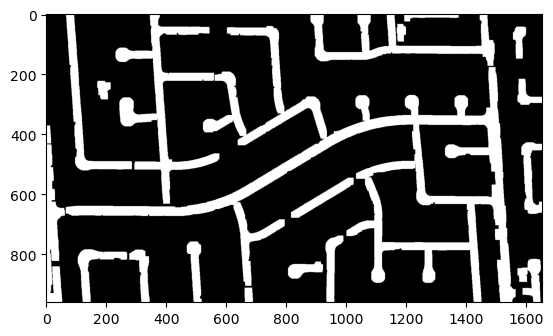

In [189]:
# Define structuring element
kernel = np.ones((7,7), np.uint8)

# Perform erosion
dilation = cv2.dilate(result, kernel, iterations = 3)

plt.imshow(dilation, cmap = 'gray')

In [190]:
mask = cv2.imread('/home/snucse/Desktop/SET-12/Image_mask.png', cv2.IMREAD_GRAYSCALE)

# Load the ground truth and predicted masks
ground_truth = np.array(mask)
predicted = dilation

# Calculate the IoU
intersection = np.logical_and(ground_truth, predicted)
union = np.logical_or(ground_truth, predicted)
iou = np.sum(intersection) / np.sum(union)

# Calculate the Dice coefficient
dice = 2 * np.sum(intersection) / (np.sum(ground_truth) + np.sum(predicted))

# Calculate the pixel accuracy
accuracy = np.sum(ground_truth == predicted) / np.sum(ground_truth)

# Print the results
print('IoU:', iou)
print('Dice coefficient:', dice)
print('Pixel accuracy:', accuracy)
print('PSNR: ', cv2.PSNR(ground_truth, predicted))

IoU: 0.09907446762785767
Dice coefficient: 0.000731672261014799
Pixel accuracy: 0.05986401309398831
PSNR:  6.358759002921088


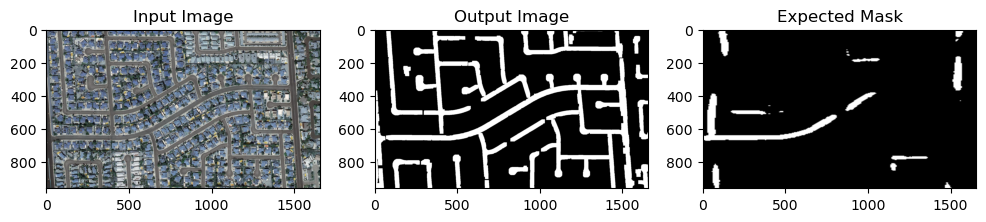

In [192]:
# Create a figure with three subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Plot the first image
axs[0].imshow(image, cmap='gray')
axs[0].set_title('Input Image')

# Plot the second image
axs[1].imshow(dilation, cmap='gray')
axs[1].set_title('Output Image')

# Plot the third image
axs[2].imshow(mask, cmap='gray')
axs[2].set_title('Expected Mask')

# Show the plot
plt.show()

# There is still some noise that can be removed

In [198]:
# do connected components processing
nlabels, labels, stats, centroids = cv2.connectedComponentsWithStats(result, None, None, None, 8, cv2.CV_32S)

#get CC_STAT_AREA component as stats[label, COLUMN] 
areas = stats[1:,cv2.CC_STAT_AREA]

result = np.zeros((labels.shape), np.uint8)

for i in range(0, nlabels - 1):
    if areas[i] >=500:   #keep
        result[labels == i + 1] = 255

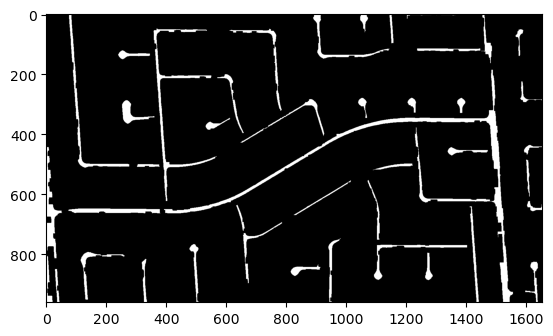

In [199]:
plt.imshow(result, cmap='gray')

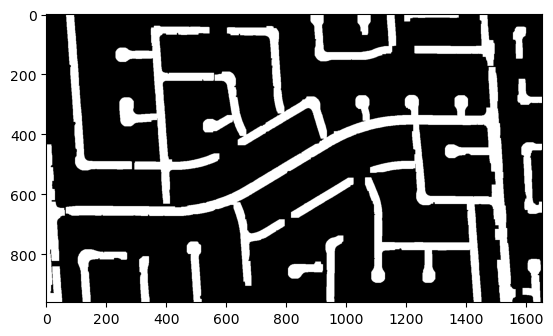

In [200]:
# Define structuring element
kernel = np.ones((7,7), np.uint8)

# Perform erosion
dilation = cv2.dilate(result, kernel, iterations = 3)

plt.imshow(dilation, cmap = 'gray')

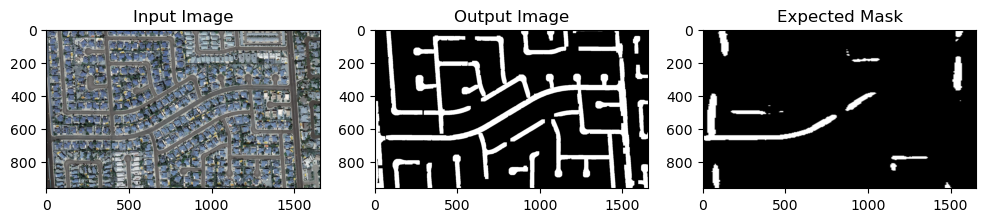

In [201]:
# Create a figure with three subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Plot the first image
axs[0].imshow(image, cmap='gray')
axs[0].set_title('Input Image')

# Plot the second image
axs[1].imshow(dilation, cmap='gray')
axs[1].set_title('Output Image')

# Plot the third image
axs[2].imshow(mask, cmap='gray')
axs[2].set_title('Expected Mask')

# Show the plot
plt.show()

### Since my generated mask captures a lot more information than the given ground truth mask, image similarity metrics are expected to be poor.